 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [347]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [348]:
# Reading whale returns

aapl_csv = ("aapl_historical.csv")
algo_returns_csv = ("algo_returns.csv")
cost_historical_csv = ("/cost_historical.csv")
goog_historical_csv = ("goog_historical.csv")
sp500_history_csv = ("sp500_history.csv")
whale_csv = ("whale_returns.csv")


# YOUR CODE HERE
whale_df = pd.read_csv(whale_csv, index_col="Date",parse_dates=True, infer_datetime_format=True)
whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [349]:
# Count nulls

whale_df.isnull().sum()

# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [350]:
# Drop nulls
# YOUR CODE HERE

whale_df = whale_df.dropna()
whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [351]:
# Reading algorithmic returns


algo_df = pd.read_csv(algo_returns_csv,index_col="Date", 
                      parse_dates=True, infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [352]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [353]:
# Drop nulls

algo_df = algo_df.dropna()
algo_df.head()


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [354]:
# Reading S&P 500 Closing Prices, sorting index

sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", 
                       parse_dates=True, infer_datetime_format=True)

sp500_df.columns =['SP500']
sp500_df.head()

,SP500
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [355]:
# Check Data Types

sp500_df.dtypes

SP500    object
dtype: object

In [356]:
# Fix Data Types
sp500_df['SP500'] = sp500_df.SP500.str.replace("$","").astype(float)
sp500_df.head()

,SP500
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [357]:
# Calculate Daily Returns

sp500_df = sp500_df.pct_change()

sp500_returns.head()

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [358]:
# Drop nulls
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [359]:
sp500_returns

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [360]:
# Rename Column

sp500_returns.rename(columns={'Close':'S&P500'}, inplace=True)
sp500_returns.head()

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [361]:
sp500_returns.columns

Index(['S&P500'], dtype='object')

## Combine Whale, Algorithmic, and S&P 500 Returns

In [362]:
# Concatenate all DataFrames into a single DataFrame

combined_returns = pd.concat([whale_df,algo_df,sp500_returns],axis="columns",join="inner")

combined_returns_sorted = combined_returns.sort_index(inplace=True)
combined_returns_sorted = combined_returns.dropna()

combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

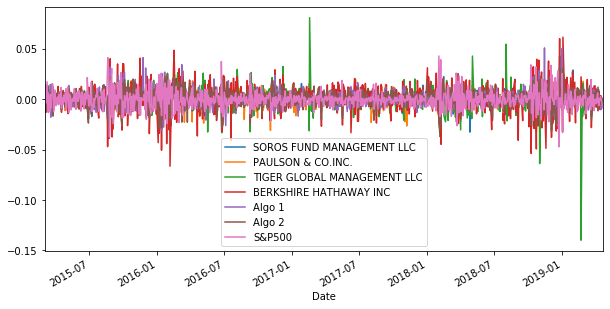

In [363]:
# Plot daily returns
combined_returns.plot(figsize=(10,5))

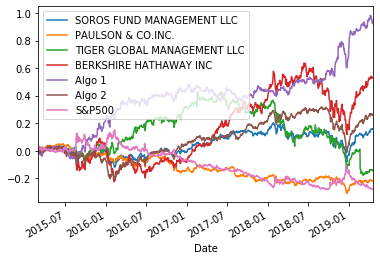

In [364]:
# Plot cumulative returns

cumulative_returns = (1 + combined_returns).cumprod() - 1
cumulative_returns.plot()


---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

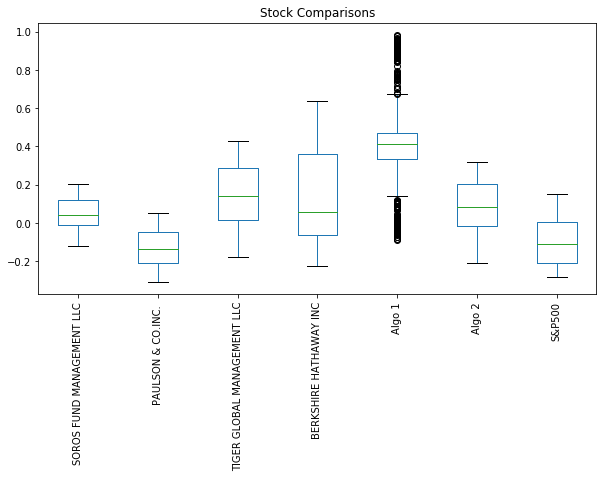

In [365]:
# Box plot to visually show risk

cumulative_returns.plot.box(figsize=(10,5),title="Stock Comparisons",rot=90)

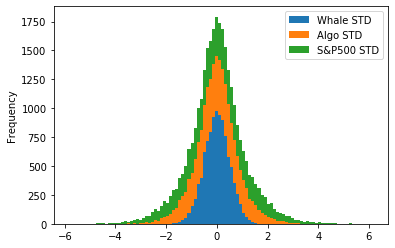

In [366]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?

whale_df_std = whale_df.std()
algo_df_std = algo_df.std()
sp500_std = sp500_df.std()

whale_df_std = np.random.normal(scale=0.5, size=10000)
algo_df_std = np.random.normal(scale=1.0, size=10000)
sp500_df_std = np.random.normal(scale=1.5, size=10000)

combined_std = pd.DataFrame({
    "Whale STD": whale_df_std,
    "Algo STD": algo_df_std,
    "S&P500 STD": sp500_df_std
})


combined_std.plot.hist(stacked=True, bins=100)


In [367]:
# Determine which portfolios are riskier than the S&P 500




## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

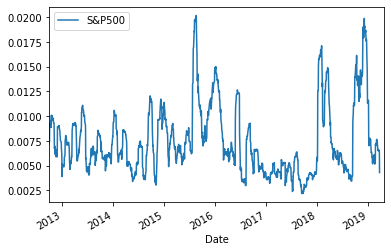

In [368]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
sp500_returns.rolling(window=21).std().plot()

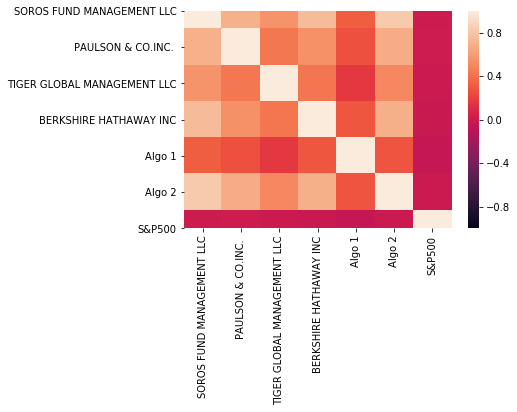

In [369]:
# Correlation
correlation = combined_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)


In [383]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance = combined_returns['Algo 1'].cov(combined_returns['S&P500'])
covariance

-2.2230425517155273e-06

In [384]:
variance = sp500_returns.var()
variance

S&P500    0.000066
dtype: float64

In [385]:
whale_df_beta = covariance / variance
whale_df_beta

S&P500   -0.033595
dtype: float64

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [ ]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [ ]:
cumulative_returns


In [ ]:
# Annualzied Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios.head(10)

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [403]:
# Read the first stock
fb_csv = "fb_csv - FB.csv"

fb_df = pd.read_csv(fb_csv, index_col="Date",parse_dates=True, 
                             infer_datetime_format=True)
fb_df.rename(columns={'Close':'FB'}, inplace=True)
fb_df.head()

,FB
Date,
2015-03-03,79.60
2015-03-04,80.90
2015-03-05,81.21
2015-03-06,80.01
2015-03-09,79.44


In [404]:
# Read the second stock
msft_csv = Path("msft_csv - MSFT.csv")

msft_df = pd.read_csv(msft_csv, index_col="Date",parse_dates=True, 
                             infer_datetime_format=True)
msft_df.rename(columns={'Close':'MSFT'}, inplace=True)
msft_df.head()

,MSFT
Date,
2015-03-03,43.28
2015-03-04,43.06
2015-03-05,43.11
2015-03-06,42.36
2015-03-09,42.85


In [405]:
# Read the third stock
amzn_csv = ("amzn_csv - AMZN.csv")

amzn_df = pd.read_csv(amzn_csv, index_col="Date",parse_dates=True, 
                             infer_datetime_format=True)
amzn_df.rename(columns={'Close':'AMZN'}, inplace=True)

amzn_df.head()

,AMZN
Date,
2015-03-03,384.61
2015-03-04,382.72
2015-03-05,387.83
2015-03-06,380.09
2015-03-09,378.56


In [406]:
# Concatenate all stocks into a single DataFrame

my_stock_portfolio = pd.concat([fb_df,msft_df,amzn_df,], 
                            axis="columns", join="inner")

my_stock_portfolio.head()

,FB,MSFT,AMZN
Date,,,
2015-03-03,79.60,43.28,384.61
2015-03-04,80.90,43.06,382.72
2015-03-05,81.21,43.11,387.83
2015-03-06,80.01,42.36,380.09
2015-03-09,79.44,42.85,378.56


In [407]:
# Reset the index
my_stock_portfolio.sort_index(inplace=True)

my_stock_portfolio = my_stock_portfolio.pct_change()
my_stock_portfolio.head()

,FB,MSFT,AMZN
Date,,,
2015-03-03,NaN,NaN,NaN
2015-03-04,0.016332,-0.005083,-0.004914
2015-03-05,0.003832,0.001161,0.013352
2015-03-06,-0.014777,-0.017397,-0.019957
2015-03-09,-0.007124,0.011568,-0.004025


In [408]:
# Drop Nulls

my_stock_portfolio.dropna()


,FB,MSFT,AMZN
Date,,,
2015-03-04,0.016332,-0.005083,-0.004914
2015-03-05,0.003832,0.001161,0.013352
2015-03-06,-0.014777,-0.017397,-0.019957
2015-03-09,-0.007124,0.011568,-0.004025
2015-03-10,-0.023792,-0.019137,-0.023906
...,...,...,...
2019-12-23,-0.000582,0.000000,0.003638
2019-12-24,-0.005141,-0.000191,-0.002114
2019-12-26,0.013017,0.008197,0.044467


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [409]:
# Calculate weighted portfolio returns

weights = [1/3, 1/3, 1/3]
superior_returns = my_stock_portfolio.dot(weights)

superior_returns


Date
2015-03-03         NaN
2015-03-04    0.002111
2015-03-05    0.006115
2015-03-06   -0.017377
2015-03-09    0.000139
                ...   
2019-12-23    0.001019
2019-12-24   -0.002482
2019-12-26    0.021893
2019-12-27    0.001290
2019-12-30   -0.012868
Length: 1217, dtype: float64

In [410]:
superior_returns.dropna(inplace=True)



## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [411]:
# YOUR CODE HERE
all_portfolios = pd.concat([my_stock_portfolio,combined_returns],
                           axis="columns",join="inner")

all_portfolios.head()

,FB,MSFT,AMZN,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,,,,
2015-03-03,NaN,NaN,NaN,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.016332,-0.005083,-0.004914,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.003832,0.001161,0.013352,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.014777,-0.017397,-0.019957,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,-0.007124,0.011568,-0.004025,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [412]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
all_portfolios.dropna
all_portfolios.columns


Index(['FB', 'MSFT', 'AMZN', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'S&P500'],
      dtype='object')

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

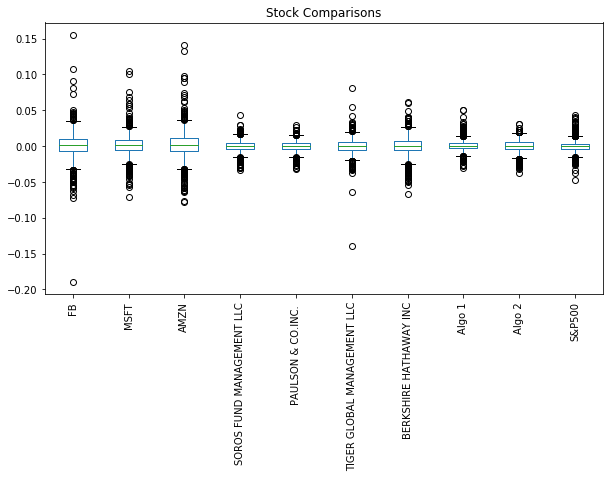

In [413]:
# Risk
all_portfolios.plot.box(figsize=(10,5),title="Stock Comparisons",rot=90)

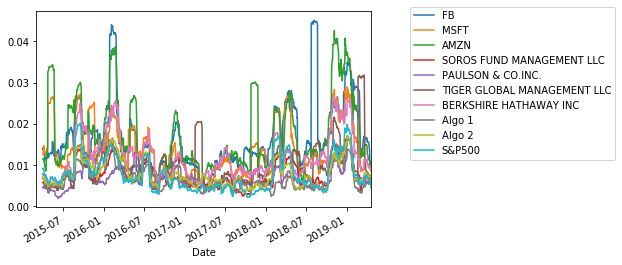

In [425]:
# Rolling
tmpPlot = all_portfolios.rolling(window=21).std().plot()
tmpPlot.legend(bbox_to_anchor=(1.1, 1.05))




In [415]:
all_portfolios.to_clipboard()

In [416]:
# Beta
covariance = all_portfolios['AMZN'].cov(all_portfolios['Algo 1'])


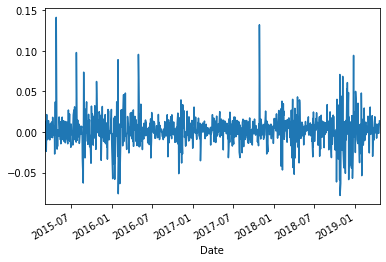

In [417]:
all_portfolios['AMZN'].plot()

In [418]:
# Annualzied Sharpe Ratios
total_sharpe = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))

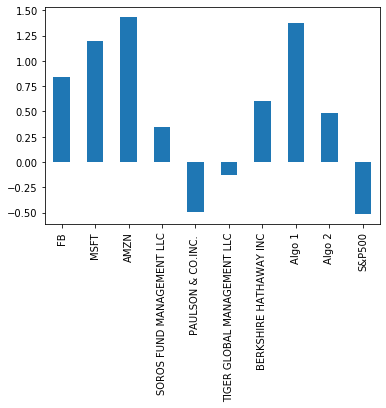

In [419]:
# Visualize the sharpe ratios as a bar plot
total_sharpe.plot(kind='bar')

## Include correlation analysis to determine which stocks (if any) are correlated

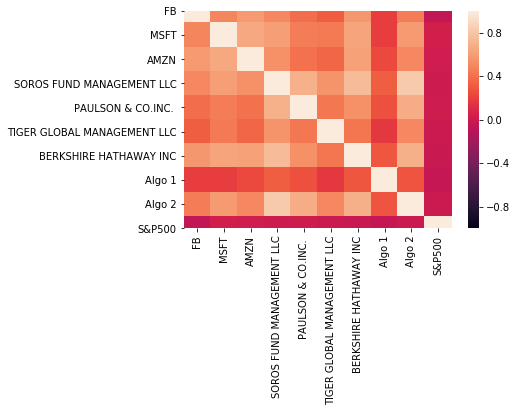

In [420]:
correlation = all_portfolios.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)